## **PART II - FORD GOBIKE TRIP COMPLETION**
## **BY ADURAGBEMI OYINLOLA**

## **INVESTIGATION OVERVIEW**

> In this investigation, I looked at factors that caused individuals to not complete their trip using bikes.

## **DATASET OVERVIEW**

> Ford GoBike system data; this data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset contain 183412 rows and  16 columns.

In [1]:
# packages used in this project
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

In [2]:
# using the cleaned dataset from the part 1 of the project
bikes = pd.read_csv('bikes.csv')
bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


#### **OBJECT TO DATETIME**

Converted the object data type to datetime data type.

In [3]:
features = ['start_time', 'end_time']

for feat in features:
    bikes[feat] = pd.to_datetime(bikes[feat])
    
for feat in features:
    print(bikes[feat].dtype)

datetime64[ns]
datetime64[ns]


#### **NUMERIC TO OBJECT**

Converted from the numeric types to the object data type.

In [4]:
num_obj = ['start_station_id', 'end_station_id', 'bike_id']

for feat in num_obj:
    bikes[feat] = bikes[feat].astype(str)

#### **OBJECT TO CATEGORICAL**

Converted from the object data type to categorical data type.

In [5]:
cat_dict = {
            'member_gender': ['Male', 'Female', 'Other']
            }

for var in cat_dict:
    cat_type = pd.api.types.CategoricalDtype(ordered=True, 
                                             categories=cat_dict[var])
bikes[var] = bikes[var].astype(cat_type)

## **DISTRIBUTION OF BIKE SHARE FOR ALL TRIP**

> In the chart below, I looked at distribution of how people completed their trip i.e if they used bike for all their trips or not. From the plot we see that most people didn't complete all their trip using bike.

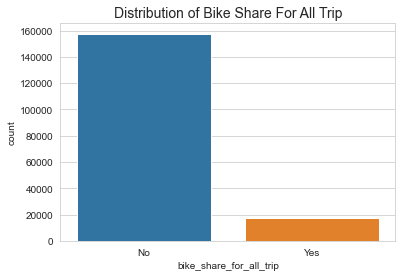

In [13]:
sns.countplot(x='bike_share_for_all_trip', data=bikes);
plt.title('Distribution of Bike Share For All Trip', size=14);

## **DURATION OF TRIP VS TRIP STATUS**

> Now, let's take a look at how the duration of the trip affected the trip status, from the boxplot below we see that individuals who spent more time on the bike didn't complete the trip. Trips with longer duration suggests longer travel distance.

In [44]:
#function to make boxplot
def boxh(x, y, data, hue, sym):
    sns.boxplot(x=x, y=y, data=data, hue=hue, sym=sym);

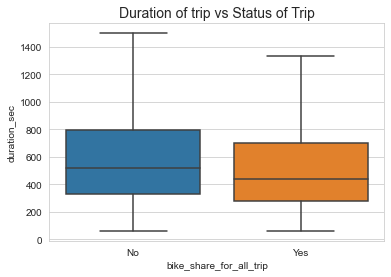

In [42]:
boxh(x='bike_share_for_all_trip', y='duration_sec', hue=None, data=bikes, sym='');
plt.title('Duration of trip vs Status of Trip', size=14);

## **TRIP STATUS VS GENDER OF MEMBERS**

> Looking at the rate of the bike_share_for_all_trip by gender and duration of the trip, we see that the gender with most complete and incomplete trips by the duration of the trip is the male gender, followed by the female gender and the other gender.

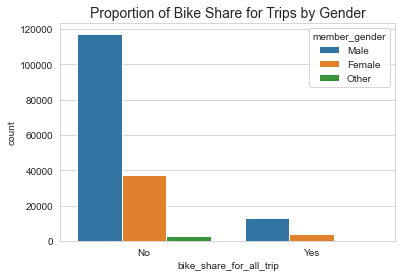

In [24]:
sns.countplot(data=bikes, x='bike_share_for_all_trip', hue='member_gender');
plt.title('Proportion of Bike Share for Trips by Gender', size=14);

## **TRIP STATUS BY THE DURATION AND MEMBER BIRTH YEAR**

> Below is a multivariate plot showing share_for_all_trip is affected by both the duration of the trip and the birth year of member. From this, we can deduce that most of the members that spent more time on bikes didn't complete their trip using bike and this member are the younger ones this can be due to the fact that there are more younger individuals than the older one.

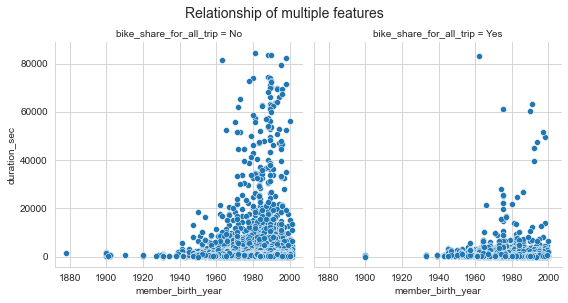

In [40]:
g = sns.FacetGrid(data=bikes, col='bike_share_for_all_trip', height=4);
g.map(sns.scatterplot, 'member_birth_year', 'duration_sec');
plt.suptitle('Relationship of multiple features', y=1.04, size=14);

## **INFLUENCE OF THE USER TYPE AND DURATION OF TRIP ON THE TRIP STATUS**

> Apart from the gender of the rider and the duration of the trip on its own, we see that the user type of the individual using the bike affected them completing the trip with bikes. From the plot below, we see that no individual from the *Customer* group completed their trip using bike but we see that the _Subscriber_ have a good rate.

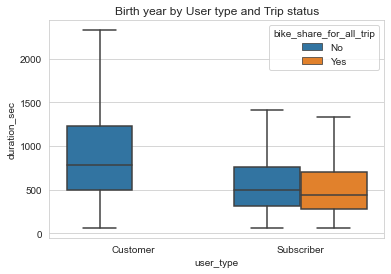

In [43]:
boxh(x='user_type', y='duration_sec', 
            data=bikes, hue='bike_share_for_all_trip', sym='');
plt.title('Birth year by User type and Trip status');